#Ammonia Synthesis - Calculation
$N_{2}(g) + 3H_{2} → 2NH_{3}(g)$
#### Standard Enthalpy:
$Δh_{R}^o=∑v_{i}h^o_{f,i}=-h^o_{f,N_{2}}-3h^o_{f,H_{2}}+2h^o_{f,NH_{3}}$
- $Δh_{R}^o=-92\frac{kJ}{mol}$

$Δh_{R}=-∫_{T_{1}}^{T_{2}}CpdT+Δh_{R}^o+∫_{T_{1}}^{T_{2}}CpdT$
#### Standard Entropy:
$Δs_{R}^o=∑v_{i}s^o_{i}=-s^o_{N_{2}}-3s^o_{H_{2}}+2s^o_{NH_{3}}$
- $Δs_{R}^o=-196\frac{J}{mol\ K}$

#### Standard Gibbs Free Energy:
$Δg_{R}^o= Δh_{R}^o - TΔs_{R}^o$
\
\
$Δg_{R}^o \rightarrow K_{eq}(T)$
####Equilibrium constatnt at a specified Temp:
$$K_{eq} = \frac{y^2_{NH_{3}}}{y_{N_2}-y^3_{H_{2}}} \left( \frac{P^o}{P}\right)^2$$
$$=\frac{4ξ^2(4n_{N_{2},0}-2ξ)^2}{27(n_{N_{2},0}-ξ)^4} \left( \frac{P^o}{P}\right)^2$$
$$=exp\left(-\frac{Δg^0_{R}}{RT}\right)$$

In [106]:
import numpy as np
from scipy.optimize import fsolve  # Solves for one unknown if one equation is given
from scipy.integrate import quad  # Solver that is used for integration

#specifications
#temp range in C
T1= 0
T2= 700
#Pressure range in atm
P1= 1
P2= 1000

#Coefficients
c_N2 = -1
c_H2 = -3
c_NH3 = 2

In [107]:
# Creating parameters for calculating heat capacities
def CpParams(species):
    if species in np.array(['N2']):
        A = 3.280
        B = 0.000593
        C = 0.0
        D = 4000
        E = 0.0
    elif species in np.array(['H2']):
        A = 3.639
        B = 0.000422
        C = 0.0
        D = -8300
        E = 0.0
    elif species in np.array(['NH3']):
        A = 3.5778
        B = 0.00302
        C = 0.0
        D = -18600
        E = 0.0
    return (A, B, C, D, E)

def h_ig_N2(T1,T2):
  A, B, C, D, E = CpParams('N2')
  def CpCalc(T, A, B, C, D, E):
    T = T + 273.15 # need to convert celcius to kelvin
    R = 0.008314  # the gas constant in units of Kj mol K^-1
    Cp = R * (A + (B * T) + (C * T**2) + (D * (T**(-2))) + (E * (T**3)))
    return Cp

  h_ig_N2, _ = quad(CpCalc,T1,T2, args = (A, B, C, D, E))
  h_ig_N2 = h_ig_N2 *1000
  return h_ig_N2

def h_ig_H2(T1,T2):
  A, B, C, D, E = CpParams('H2')
  def CpCalc(T, A, B, C, D, E):
    T = T + 273.15 # need to convert celcius to kelvin
    R = 0.008314  # the gas constant in units of Kj mol K^-1
    Cp = R * (A + (B * T) + (C * T**2) + (D * (T**(-2))) + (E * (T**3)))
    return Cp

  h_ig_H2, _ = quad(CpCalc,T1,T2, args = (A, B, C, D, E))
  h_ig_H2 = h_ig_H2 *1000
  return h_ig_H2

def h_ig_NH3(T1,T2):
  A, B, C, D, E = CpParams('NH3')
  def CpCalc(T, A, B, C, D, E):
    T = T + 273.15 # need to convert celcius to kelvin
    R = 0.008314  # the gas constant in units of Kj mol K^-1
    Cp = R * (A + (B * T) + (C * T**2) + (D * (T**(-2))) + (E * (T**3)))
    return Cp

  h_ig_NH3, _ = quad(CpCalc,T1,T2, args = (A, B, C, D, E))
  h_ig_NH3 = h_ig_NH3 *1000
  return h_ig_NH3

In [108]:
R = 8.314  # Gas constant in J/(mol*K)

# Function to calculate change in enthalpy at a given temperature
def delta_h_func(temp):
    delta_h_standard= -92
    delta_h_rxn = c_N2*h_ig_N2(temp,temp+1) + c_H2*h_ig_H2(temp,temp+1) + c_NH3*h_ig_NH3(temp,temp+1) + delta_h_standard
    return delta_h_rxn

def delta_s_func(temp,P):
    temp_K = temp + 273.15
    delta_s_standard= -196
    delta_s_R_T= c_N2*h_ig_N2(temp,temp+1) + c_H2*h_ig_H2(temp,temp+1) + c_NH3*h_ig_NH3(temp,temp+1)
    delta_s_R_P = R * np.log(P / 1)
    delta_s_rxn = delta_s_standard + delta_s_R_T + delta_s_R_P
    return delta_s_rxn

def delta_g_func(temp,P):
    delta_h = delta_h_func(temp)
    delta_s = delta_s_func(temp,P)
    delta_g_rxn = delta_h - (temp + 273.15) * delta_s
    return delta_g_rxn

def K_eq_func(temp,P):
    delta_g = delta_g_func(temp,P)
    K_eq = np.exp(-delta_g / (R * (temp + 273.15)))
    return K_eq

# Temperature and pressure ranges
temp_range = np.linspace(T1, T2, 100)
P_range = np.linspace(P1, P2, 100)

delta_g_values = np.zeros((len(temp_range), len(P_range)))
delta_h_values = np.zeros((len(temp_range), len(P_range)))
delta_s_values = np.zeros((len(temp_range), len(P_range)))
K_eq_values = np.zeros((len(temp_range), len(P_range)))

for i, temp in enumerate(temp_range):
    for j, P in enumerate(P_range):
        # delta G
        delta_g_values[i, j] = delta_g_func(temp, P)

        # delta H and delta S
        delta_h_values[i, j] = delta_h_func(temp)
        delta_s_values[i, j] = delta_s_func(temp, P)

        # Calculate K_eq
        K_eq_values[i, j] = K_eq_func(temp, P)

#Plot

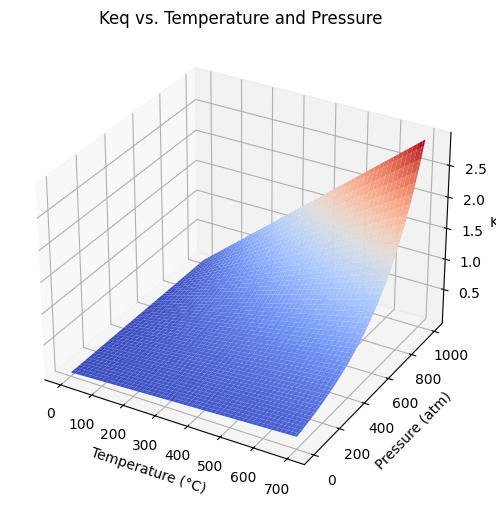

In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot temperature vs. pressure vs. exponential
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
T_grid, P_grid = np.meshgrid(temp_range, P_range)
surf = ax.plot_surface(T_grid,P_grid, K_eq_values, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('Keq')
ax.set_title('Keq vs. Temperature and Pressure')
plt.show()